In [1]:
import sys
sys.path.insert(0, '/Users/livestorborg/Desktop/FYS-STK4155/project2/code')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from src.neural_network import NeuralNetwork
from src.activations import Sigmoid, Linear
from src.losses import MSE
from src.optimizers import GD, RMSprop, Adam
from src.training import train
from src.metrics import mse
from src.utils import runge, polynomial_features, scale_data, OLS_parameters, inverse_scale_y, find_best_eta
from src.plotting import plot_learning_curves

# Setup for OLS Regression

In [2]:
SEED = 42
np.random.seed(SEED)

N = 300
x = np.linspace(-1, 1, N)
y_true = runge(x)
y_noise = y_true + np.random.normal(0, 0.1, N)

In [3]:
X_poly = polynomial_features(x, p=14, intercept=False)

X_train_poly, X_test_poly, y_train, y_test = train_test_split(
    X_poly, y_noise, test_size=0.2, random_state=SEED
)
# Scale data
X_train_s, y_train_s, X_mean, X_std, y_mean = scale_data(X_train_poly, y_train)
X_test_s, y_test_s, _, _, _ = scale_data(
    X_test_poly, y_test, X_mean, X_std, y_mean
)

theta_ols = OLS_parameters(X_train_s, y_train_s)
y_pred_ols = X_test_s @ theta_ols
ols_mse = mse(y_test_s.reshape(-1, 1), y_pred_ols.reshape(-1, 1))

print(f"OLS Test MSE: {ols_mse:.6f}")

OLS Test MSE: 0.007290


# Setup for FFNN

In [4]:
X_train_raw, X_test_raw, y_train_nn, y_test_nn = train_test_split(
    x.reshape(-1, 1), y_noise.reshape(-1, 1), 
    test_size=0.2, random_state=SEED
)

# Scale
X_train_s, y_train_s, X_mean, X_std, y_mean = scale_data(X_train_raw, y_train_nn)
X_test_s, y_test_s, _, _, _ = scale_data(X_test_raw, y_test_nn, X_mean, X_std, y_mean)

y_test_real = inverse_scale_y(y_test_s, y_mean)

# Parameters for FFNN

In [5]:
# Experiment 1: one hidden layer and 50 hidden nodes
layer_sizes_1 = [50, 1]
activations_1 = [Sigmoid(), Linear()]


# Experiment 2: two hidden layers and 100 hidden nodes each
layer_sizes_2 = [100, 100, 1]
activations_2 = [Sigmoid(), Sigmoid(), Linear()]


EPOCHS = 500
BATCH_SIZE = 32
LOSS = MSE()
NETWORK_INPUT_SIZE = 1

# Full batch Gradient Descent

### Experiment 1: One hidden layer & 50 hidden nodes

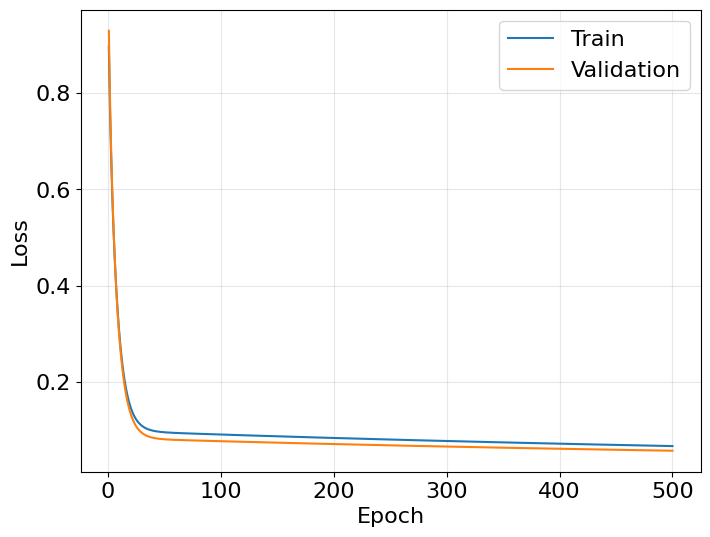

Final Train MSE (scaled): 0.067103
Final Test MSE (scaled): 0.057451

Final Train MSE (original scale): 0.067103
Final Test MSE (original scale): 0.057451


In [21]:
nn_gd_1 = NeuralNetwork(
    network_input_size=NETWORK_INPUT_SIZE,
    layer_output_sizes=layer_sizes_1,
    activations=activations_1,
    loss=LOSS,
    seed=SEED
)


history = train(
            nn=nn_gd_1,
            X_train=X_train_s,
            y_train=y_train_s,
            X_val=X_test_s,
            y_val=y_test_s,
            optimizer=GD(eta=0.01),
            epochs=EPOCHS,
            batch_size=len(X_train_s),  # Full batch
            stochastic=False,
            task='regression',
            early_stopping=False,
            patience=10,
            verbose=False,
            seed=SEED
        )

# Access the results
train_loss = history['train_loss']  # This will be MSE on scaled data
val_loss = history['val_loss']      # This will be MSE on scaled data

# Plot learning curves
plot_learning_curves(train_loss, val_loss)

# Get final MSE on scaled data
print(f"Final Train MSE (scaled): {train_loss[-1]:.6f}")
print(f"Final Test MSE (scaled): {val_loss[-1]:.6f}")

# If you want MSE on original scale:
y_train_pred_scaled = nn_gd_1.predict(X_train_s)
y_test_pred_scaled = nn_gd_1.predict(X_test_s)

# Inverse transform predictions
y_train_pred = inverse_scale_y(y_train_pred_scaled, y_mean)
y_test_pred = inverse_scale_y(y_test_pred_scaled, y_mean)

# Calculate MSE on original scale
train_mse_original = mse(y_train_nn, y_train_pred)
test_mse_original = mse(y_test_nn, y_test_pred)

print(f"\nFinal Train MSE (original scale): {train_mse_original:.6f}")
print(f"Final Test MSE (original scale): {test_mse_original:.6f}") 

### Experiment 2: Two hidden layers & 100 hidden nodes

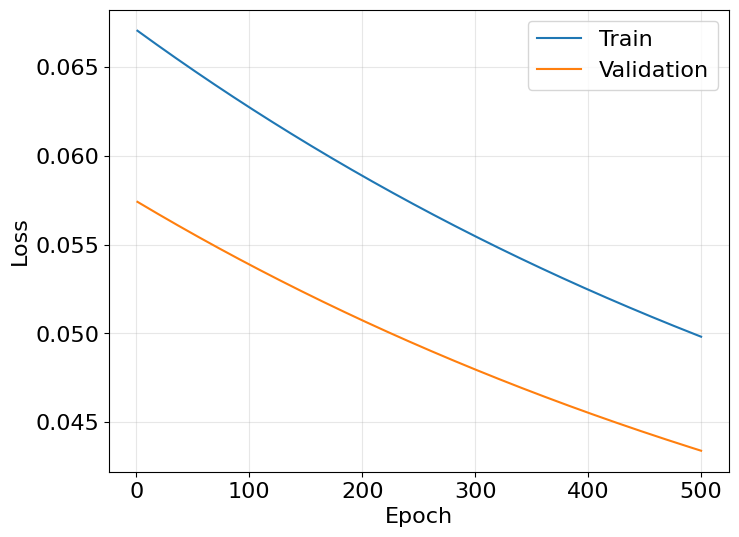

Final Train MSE (scaled): 0.049812
Final Test MSE (scaled): 0.043386

Final Train MSE (original scale): 0.049812
Final Test MSE (original scale): 0.043386


In [ ]:
nn_gd_2 = NeuralNetwork(
    network_input_size=NETWORK_INPUT_SIZE,
    layer_output_sizes=layer_sizes_2,
    activations=activations_2,
    loss=LOSS,
    seed=SEED
)


history = train(
            nn=nn_gd_1,
            X_train=X_train_s,
            y_train=y_train_s,
            X_val=X_test_s,
            y_val=y_test_s,
            optimizer=GD(eta=0.01),
            epochs=EPOCHS,
            batch_size=len(X_train_s),  # Full batch
            stochastic=False,
            task='regression',
            early_stopping=False,
            patience=10,
            verbose=False,
            seed=SEED
        )

# Access the results
train_loss = history['train_loss']  # This will be MSE on scaled data
val_loss = history['val_loss']      # This will be MSE on scaled data

# Plot learning curves
plot_learning_curves(train_loss, val_loss)

# Get final MSE on scaled data
print(f"Final Train MSE (scaled): {train_loss[-1]:.6f}")
print(f"Final Test MSE (scaled): {val_loss[-1]:.6f}")

# If you want MSE on original scale:
y_train_pred_scaled = nn_gd_1.predict(X_train_s)
y_test_pred_scaled = nn_gd_1.predict(X_test_s)

# Inverse transform predictions
y_train_pred = inverse_scale_y(y_train_pred_scaled, y_mean)
y_test_pred = inverse_scale_y(y_test_pred_scaled, y_mean)

# Calculate MSE on original scale
from sklearn.metrics import mean_squared_error
train_mse_original = mse(y_train_nn, y_train_pred)
test_mse_original = mse(y_test_nn, y_test_pred)

print(f"\nFinal Train MSE (original scale): {train_mse_original:.6f}")
print(f"Final Test MSE (original scale): {test_mse_original:.6f}") 

# Stochastic Gradient Descent with RMSprop

### Experiment 1: One hidden layer & 50 hidden nodes

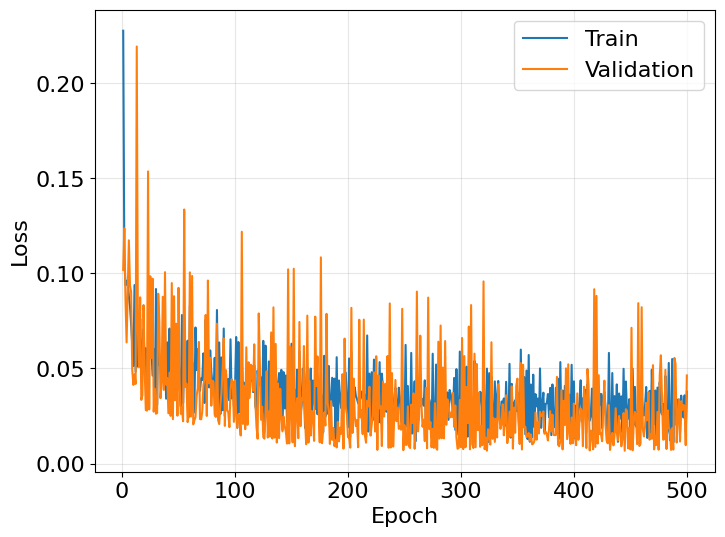

Final Train MSE (scaled): 0.037817
Final Test MSE (scaled): 0.046334

Final Train MSE (original scale): 0.049812
Final Test MSE (original scale): 0.043386


In [8]:
nn_rms_1 = NeuralNetwork(
    network_input_size=NETWORK_INPUT_SIZE,
    layer_output_sizes=layer_sizes_1,
    activations=activations_1,
    loss=LOSS,
    seed=SEED
)


history = train(
            nn=nn_rms_1,
            X_train=X_train_s,
            y_train=y_train_s,
            X_val=X_test_s,
            y_val=y_test_s,
            optimizer=RMSprop(eta=0.01),
            epochs=EPOCHS,
            batch_size=BATCH_SIZE, 
            stochastic=True,
            task='regression',
            early_stopping=False,
            patience=10,
            verbose=False,
            seed=SEED
        )

# Access the results
train_loss = history['train_loss']  # This will be MSE on scaled data
val_loss = history['val_loss']      # This will be MSE on scaled data

# Plot learning curves
plot_learning_curves(train_loss, val_loss)

# Get final MSE on scaled data
print(f"Final Train MSE (scaled): {train_loss[-1]:.6f}")
print(f"Final Test MSE (scaled): {val_loss[-1]:.6f}")

# If you want MSE on original scale:
y_train_pred_scaled = nn_gd_1.predict(X_train_s)
y_test_pred_scaled = nn_gd_1.predict(X_test_s)

# Inverse transform predictions
y_train_pred = inverse_scale_y(y_train_pred_scaled, y_mean)
y_test_pred = inverse_scale_y(y_test_pred_scaled, y_mean)

# Calculate MSE on original scale
from sklearn.metrics import mean_squared_error
train_mse_original = mean_squared_error(y_train_nn, y_train_pred)
test_mse_original = mean_squared_error(y_test_nn, y_test_pred)

print(f"\nFinal Train MSE (original scale): {train_mse_original:.6f}")
print(f"Final Test MSE (original scale): {test_mse_original:.6f}") 

### Experiment 2: Two hidden layers & 100 hidden nodes

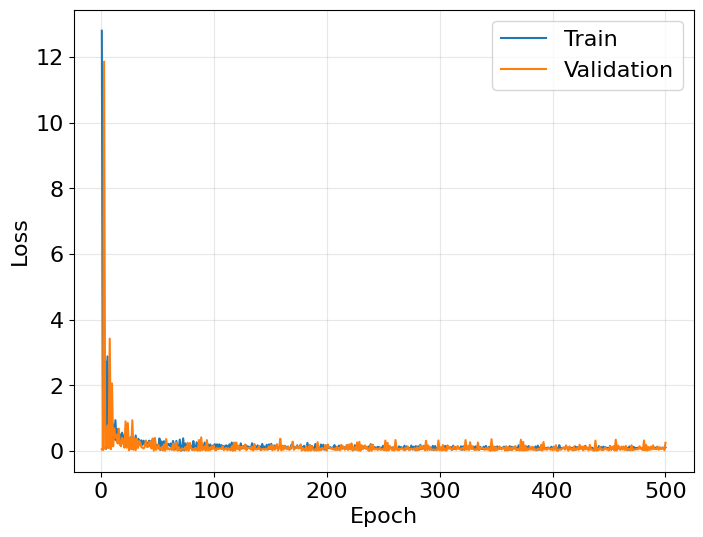

Final Train MSE (scaled): 0.108873
Final Test MSE (scaled): 0.248836

Final Train MSE (original scale): 0.049812
Final Test MSE (original scale): 0.043386


In [20]:
nn_rms_2 = NeuralNetwork(
    network_input_size=NETWORK_INPUT_SIZE,
    layer_output_sizes=layer_sizes_2,
    activations=activations_2,
    loss=LOSS,
    seed=SEED
)


history = train(
            nn=nn_rms_2,
            X_train=X_train_s,
            y_train=y_train_s,
            X_val=X_test_s,
            y_val=y_test_s,
            optimizer=RMSprop(eta=0.01),
            epochs=EPOCHS,
            batch_size=BATCH_SIZE, 
            stochastic=True,
            task='regression',
            early_stopping=False,
            patience=10,
            verbose=False,
            seed=SEED
        )

# Access the results
train_loss = history['train_loss']  # This will be MSE on scaled data
val_loss = history['val_loss']      # This will be MSE on scaled data

# Plot learning curves
plot_learning_curves(train_loss, val_loss)

# Get final MSE on scaled data
print(f"Final Train MSE (scaled): {train_loss[-1]:.6f}")
print(f"Final Test MSE (scaled): {val_loss[-1]:.6f}")

# If you want MSE on original scale:
y_train_pred_scaled = nn_gd_1.predict(X_train_s)
y_test_pred_scaled = nn_gd_1.predict(X_test_s)

# Inverse transform predictions
y_train_pred = inverse_scale_y(y_train_pred_scaled, y_mean)
y_test_pred = inverse_scale_y(y_test_pred_scaled, y_mean)

# Calculate MSE on original scale
from sklearn.metrics import mean_squared_error
train_mse_original = mean_squared_error(y_train_nn, y_train_pred)
test_mse_original = mean_squared_error(y_test_nn, y_test_pred)

print(f"\nFinal Train MSE (original scale): {train_mse_original:.6f}")
print(f"Final Test MSE (original scale): {test_mse_original:.6f}") 

# Stochastic Gradient Descent with Adam

### Experiment 1: One hidden layer & 50 hidden nodes

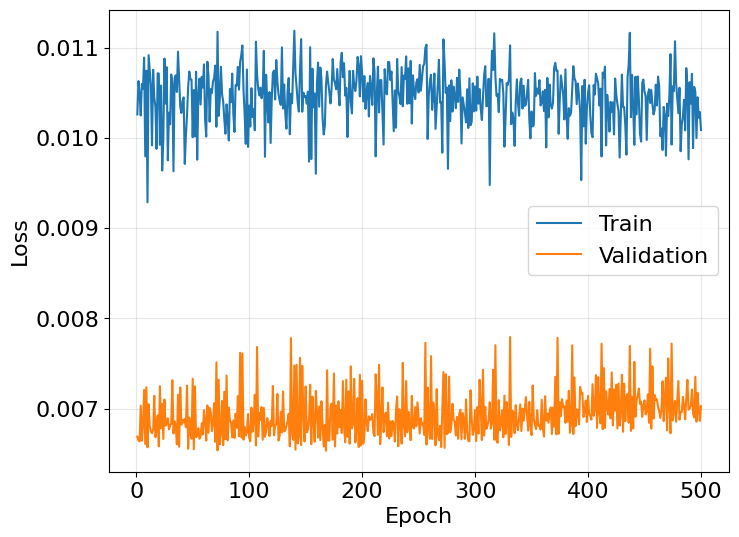

Final Train MSE (scaled): 0.010088
Final Test MSE (scaled): 0.007026

Final Train MSE (original scale): 0.049812
Final Test MSE (original scale): 0.043386


In [19]:
nn_adam_1 = NeuralNetwork(
    network_input_size=NETWORK_INPUT_SIZE,
    layer_output_sizes=layer_sizes_1,
    activations=activations_1,
    loss=LOSS,
    seed=SEED
)


history = train(
            nn=nn_rms_1,
            X_train=X_train_s,
            y_train=y_train_s,
            X_val=X_test_s,
            y_val=y_test_s,
            optimizer=Adam(eta=0.01),
            epochs=EPOCHS,
            batch_size=BATCH_SIZE, 
            stochastic=True,
            task='regression',
            early_stopping=False,
            patience=10,
            verbose=False,
            seed=SEED
        )

# Access the results
train_loss = history['train_loss']  # This will be MSE on scaled data
val_loss = history['val_loss']      # This will be MSE on scaled data

# Plot learning curves
plot_learning_curves(train_loss, val_loss)

# Get final MSE on scaled data
print(f"Final Train MSE (scaled): {train_loss[-1]:.6f}")
print(f"Final Test MSE (scaled): {val_loss[-1]:.6f}")

# If you want MSE on original scale:
y_train_pred_scaled = nn_gd_1.predict(X_train_s)
y_test_pred_scaled = nn_gd_1.predict(X_test_s)

# Inverse transform predictions
y_train_pred = inverse_scale_y(y_train_pred_scaled, y_mean)
y_test_pred = inverse_scale_y(y_test_pred_scaled, y_mean)

# Calculate MSE on original scale
from sklearn.metrics import mean_squared_error
train_mse_original = mean_squared_error(y_train_nn, y_train_pred)
test_mse_original = mean_squared_error(y_test_nn, y_test_pred)

print(f"\nFinal Train MSE (original scale): {train_mse_original:.6f}")
print(f"Final Test MSE (original scale): {test_mse_original:.6f}") 

### Experiment 2: Two hidden layers & 100 hidden nodes

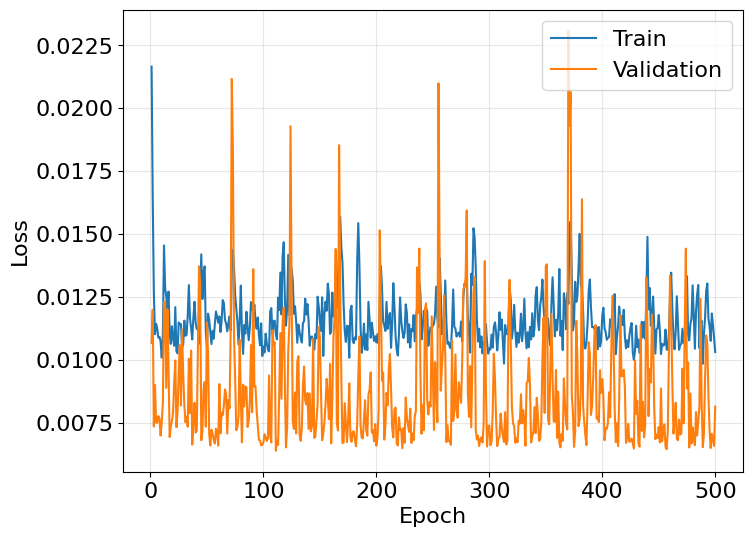

Final Train MSE (scaled): 0.010319
Final Test MSE (scaled): 0.008151

Final Train MSE (original scale): 0.049812
Final Test MSE (original scale): 0.043386


In [18]:
nn_adam_2 = NeuralNetwork(
    network_input_size=NETWORK_INPUT_SIZE,
    layer_output_sizes=layer_sizes_2,
    activations=activations_2,
    loss=LOSS,
    seed=SEED
)


history = train(
            nn=nn_rms_1,
            X_train=X_train_s,
            y_train=y_train_s,
            X_val=X_test_s,
            y_val=y_test_s,
            optimizer=Adam(eta=0.1),
            epochs=EPOCHS,
            batch_size=BATCH_SIZE, 
            stochastic=True,
            task='regression',
            early_stopping=False,
            patience=10,
            verbose=False,
            seed=SEED
        )

# Access the results
train_loss = history['train_loss']  # This will be MSE on scaled data
val_loss = history['val_loss']      # This will be MSE on scaled data

# Plot learning curves
plot_learning_curves(train_loss, val_loss)

# Get final MSE on scaled data
print(f"Final Train MSE (scaled): {train_loss[-1]:.6f}")
print(f"Final Test MSE (scaled): {val_loss[-1]:.6f}")

# If you want MSE on original scale:
y_train_pred_scaled = nn_gd_1.predict(X_train_s)
y_test_pred_scaled = nn_gd_1.predict(X_test_s)

# Inverse transform predictions
y_train_pred = inverse_scale_y(y_train_pred_scaled, y_mean)
y_test_pred = inverse_scale_y(y_test_pred_scaled, y_mean)

# Calculate MSE on original scale
from sklearn.metrics import mean_squared_error
train_mse_original = mean_squared_error(y_train_nn, y_train_pred)
test_mse_original = mean_squared_error(y_test_nn, y_test_pred)

print(f"\nFinal Train MSE (original scale): {train_mse_original:.6f}")
print(f"Final Test MSE (original scale): {test_mse_original:.6f}") 

# Results for one hidden layer and 50 hidden nodes

In [12]:
print("\n" + "="*50)
print("ONE HIDDEN LAYER & 50 HIDDEN NODES")
print("="*50)
print(f"OLS (deg 14):      {ols_mse:.6f}")
print(f"NN + GD:           {best_mse_gd_1:.6f}  (eta={best_eta_gd_1:.4f})")
print(f"NN + RMSprop:      {best_mse_rms_1:.6f}  (eta={best_eta_rms_1:.4f})")
print(f"NN + Adam:         {best_mse_adam_1:.6f}  (eta={best_eta_adam_1:.4f})")
print("="*50)


ONE HIDDEN LAYER & 50 HIDDEN NODES
OLS (deg 14):      0.007290


NameError: name 'best_mse_gd_1' is not defined

# Results for two hidden layers and 100 hidden nodes each

In [ ]:
print("\n" + "="*50)
print("TWO HIDDEN LAYERS & 100 HIDDEN NODES EACH")
print("="*50)
print(f"OLS (deg 14):      {ols_mse:.6f}")
print(f"NN + GD:           {best_mse_gd_2:.6f}  (eta={best_eta_gd_2:.4f})")
print(f"NN + RMSprop:      {best_mse_rms_2:.6f}  (eta={best_eta_rms_2:.4f})")
print(f"NN + Adam:         {best_mse_adam_2:.6f}  (eta={best_eta_adam_2:.4f})")
print("="*50)